#🧾 Problem Definition:
LoanTap aims to determine the creditworthiness of applicants requesting Personal Loans.
This is a binary classification problem where we predict whether a loan will be:
- Fully Paid (0)
- Charged Off (1)
We will use logistic regression to model the probability of default using customer attributes.
""")

# Loading the Dataset and importing required Libraries

In [ ]:
!gdown 1RE0mFwQp3lnVOQ2KNlcTDPLDH2qR9Wod

Downloading...
From: https://drive.google.com/uc?id=1RE0mFwQp3lnVOQ2KNlcTDPLDH2qR9Wod
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 65.0MB/s] 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/logistic_regression.csv")

In [ ]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status_binary
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,1
5,20000.0,36 months,13.33,677.07,C,C3,10+ years,MORTGAGE,86788.0,Verified,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,0
6,18000.0,36 months,5.32,542.07,A,A1,2 years,MORTGAGE,125000.0,Source Verified,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,0
7,13000.0,36 months,11.14,426.47,B,B2,10+ years,RENT,46000.0,Not Verified,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,0
8,18900.0,60 months,10.99,410.84,B,B3,10+ years,RENT,103000.0,Verified,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,0
9,26300.0,36 months,16.29,928.40,C,C5,3 years,MORTGAGE,115000.0,Verified,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,0


In [ ]:
cat_cols=df.select_dtypes(include='object').columns
df[cat_cols]

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# EDA

In [ ]:
df.shape

(396030, 27)

📐 Data Shape and Structure
* Total Rows: 396,030

* Total Columns: 27



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

🧩 Data Types
Out of 27 columns:

* 12 Numerical (float64): e.g. loan_amnt, annual_inc, int_rate, etc.

* 15 Categorical (category): e.g. term, grade, home_ownership, loan_status

In [ ]:
# Null Value percetage

# Calculate percentage of null values per column
null_percentage = df.isnull().mean() * 100

# Display columns with missing values (sorted by percentage)
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)

print(null_percentage)


mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443401
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Johnson\r\nFPO AE 48052
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [ ]:
high_card_cols = [col for col in df.columns if df[col].nunique() > 100 and df[col].dtype == 'object']
print("High cardinality columns:", high_card_cols)


High cardinality columns: ['emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address']


In [ ]:
null_percent = df.isnull().mean() * 100
high_null_cols = null_percent[null_percent > 50].index.tolist()
print("Columns with >50% nulls:", high_null_cols)


Columns with >50% nulls: []


In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)


Constant columns: []


In [ ]:
manual_drop = ['emp_title', 'title']


In [ ]:
cols_to_drop = set(high_card_cols + high_null_cols + constant_cols + manual_drop)
# df.drop(columns=cols_to_drop, inplace=True)
print("Dropped columns:", cols_to_drop)


## 📊 Univariate Analysis

* 2.1 Continuous Variables – Distribution Plots



In [ ]:
# continuous columns
continuous_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc',
    'dti', 'open_acc', 'pub_rec', 'revol_bal',
    'revol_util', 'total_acc', 'mort_acc'
]

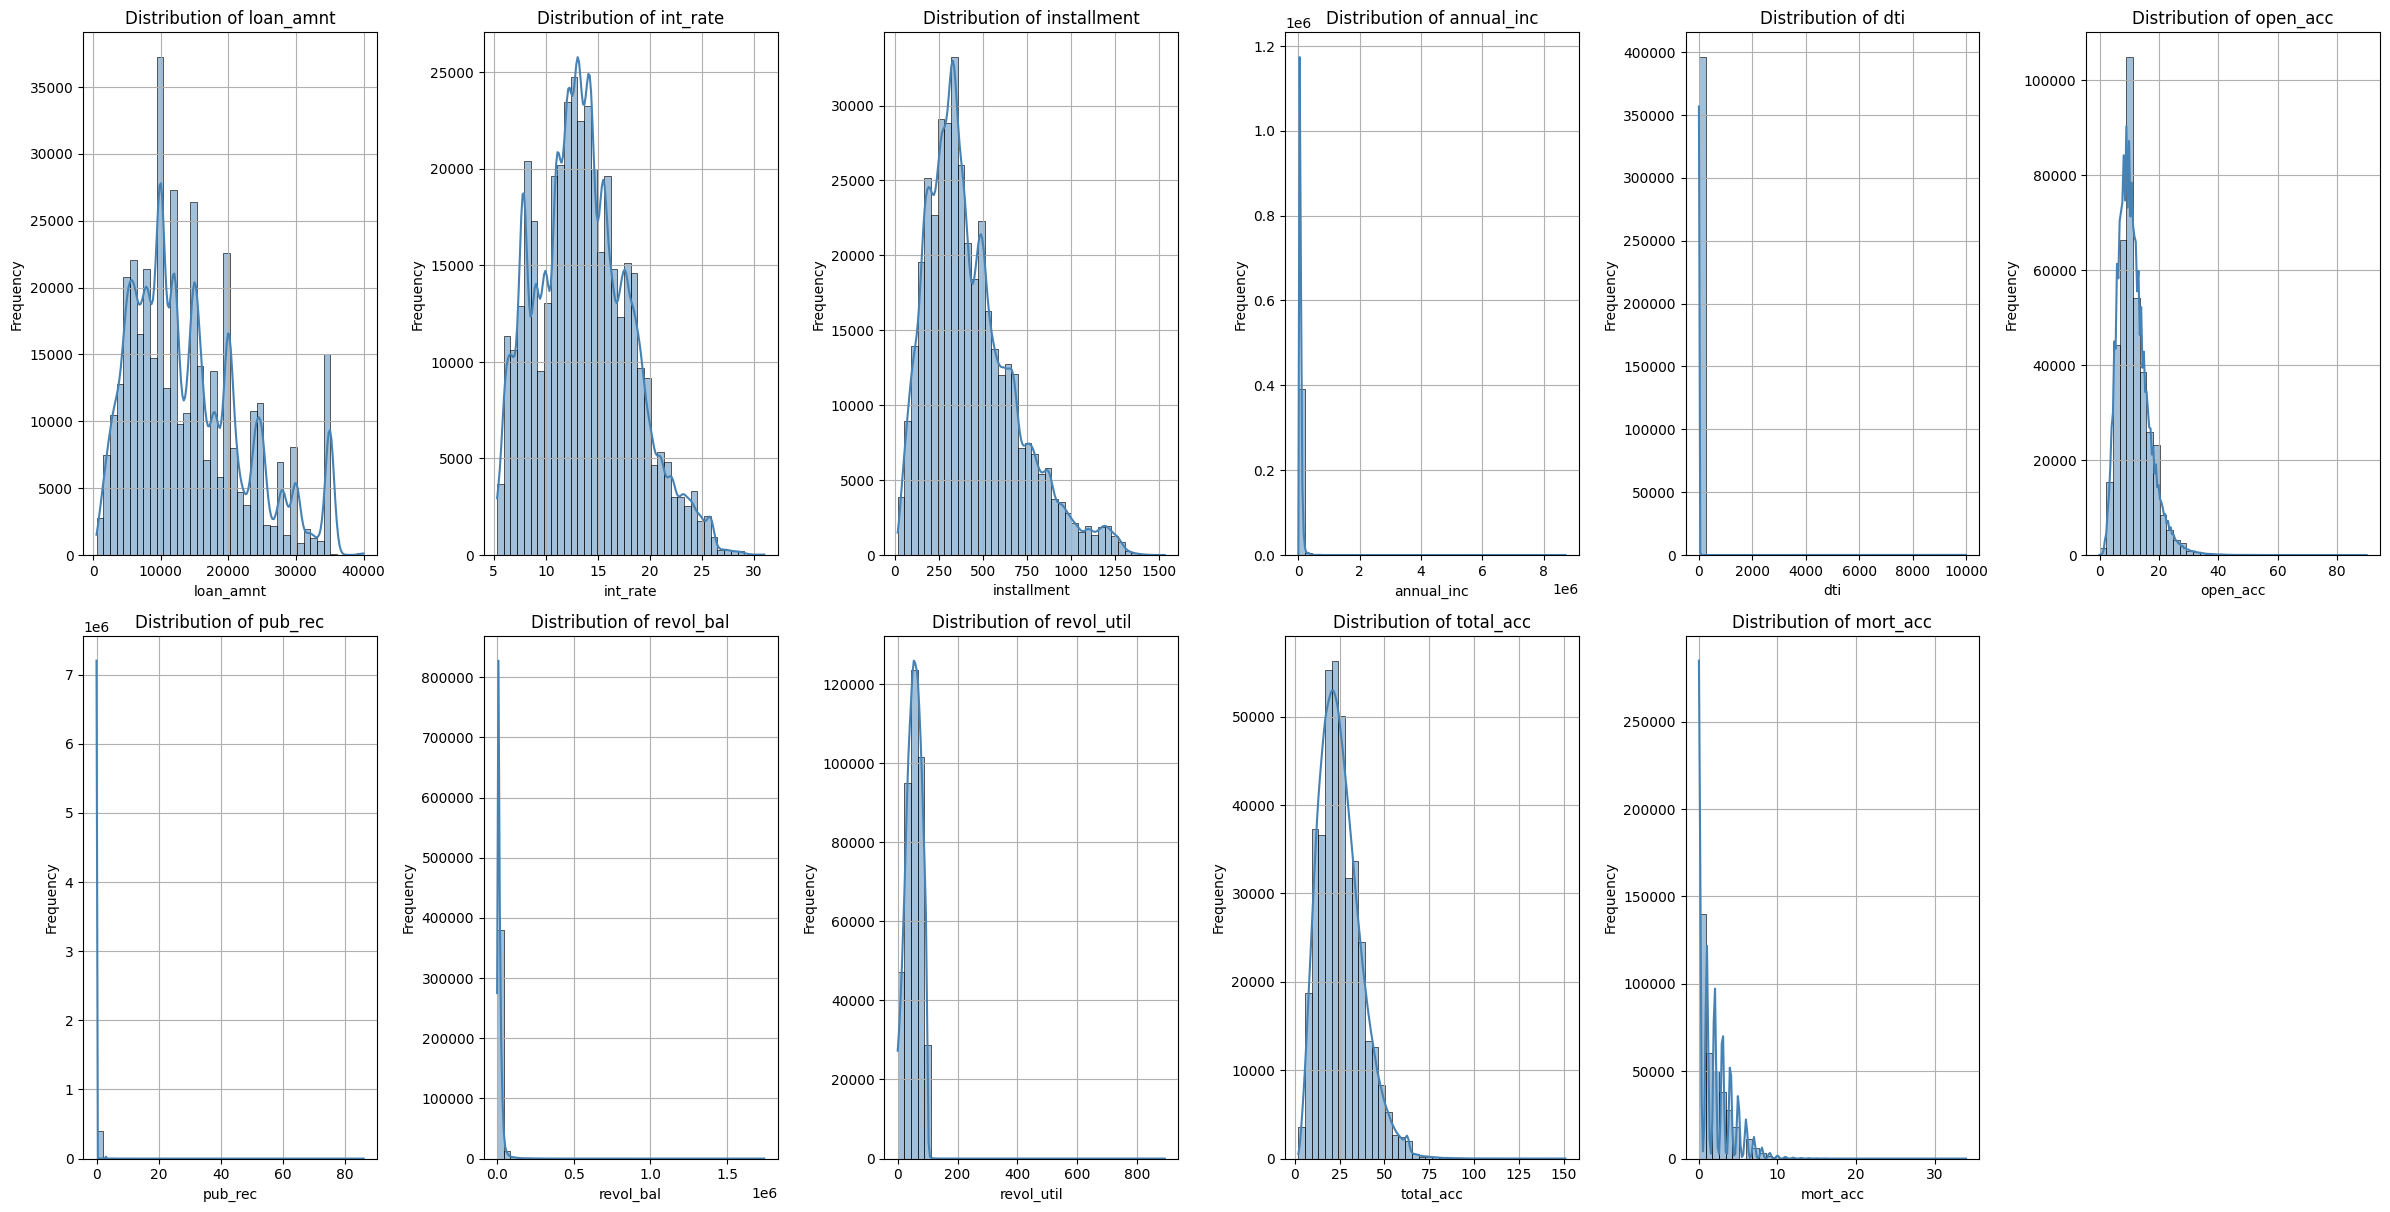

In [ ]:


fig, axes = plt.subplots(8, 6, figsize=(24, 48))  # 8x8 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(continuous_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=40, color='steelblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


* 2.2 Categorical Variables – Count Plots

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

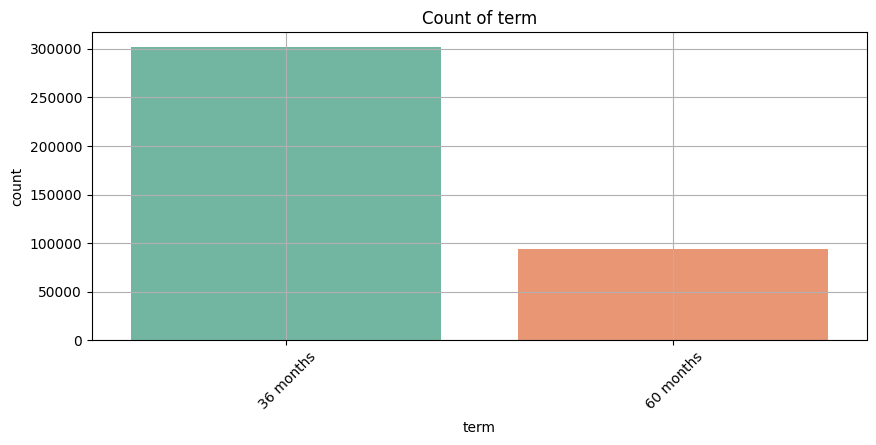

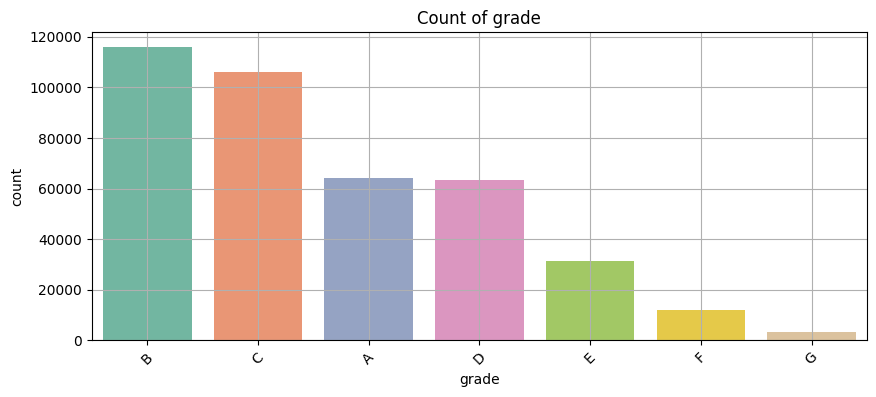

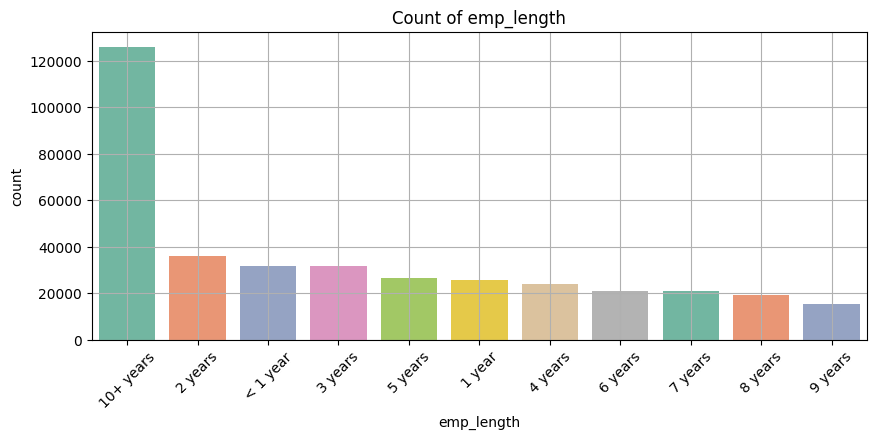

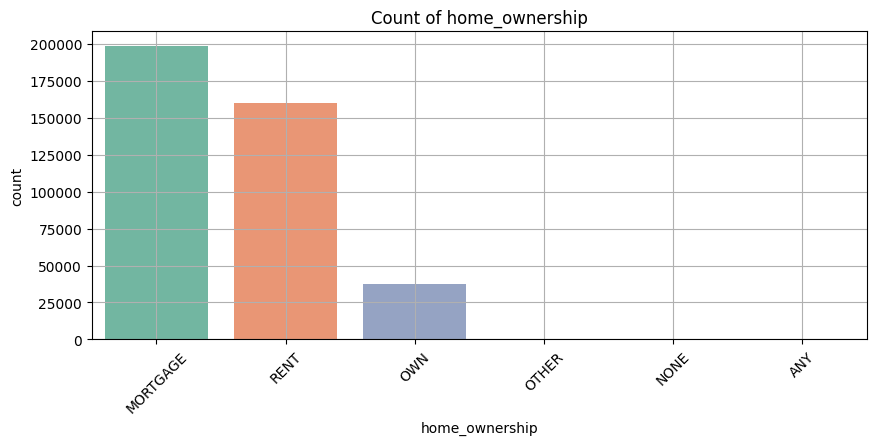

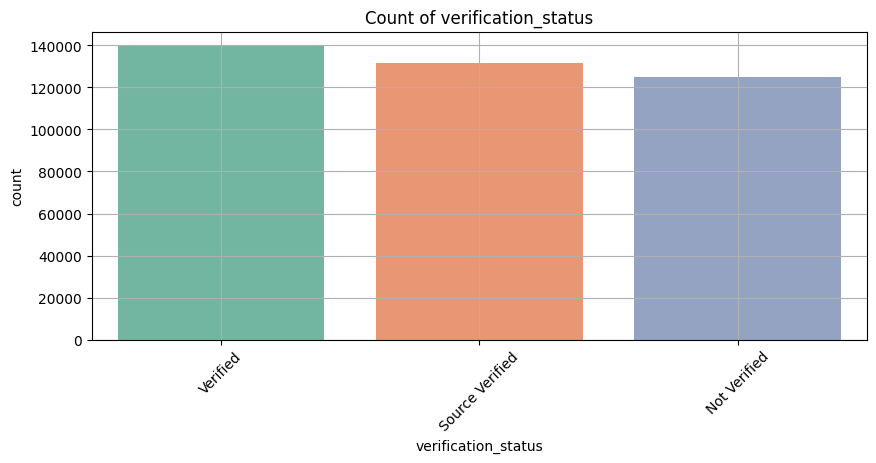

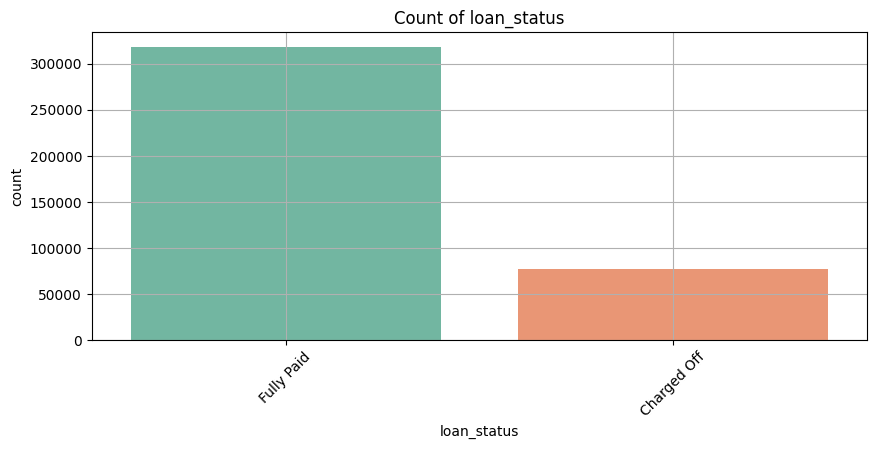

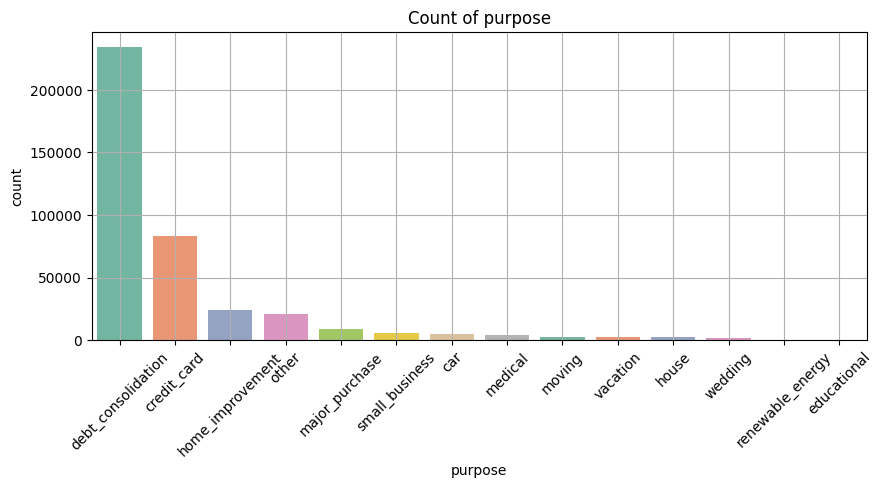

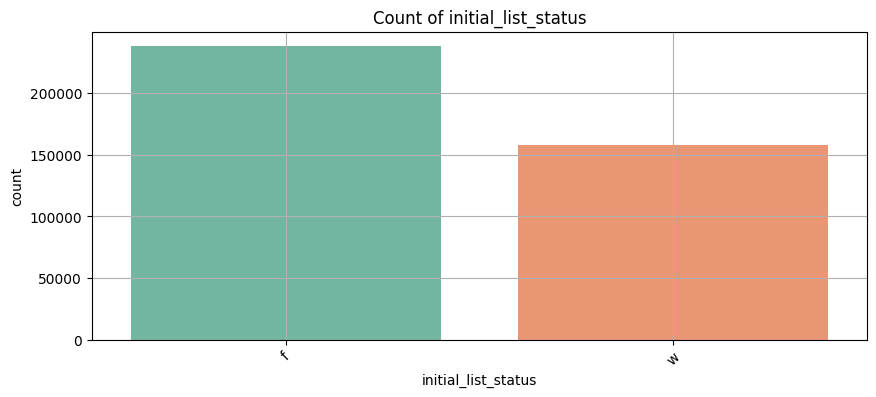

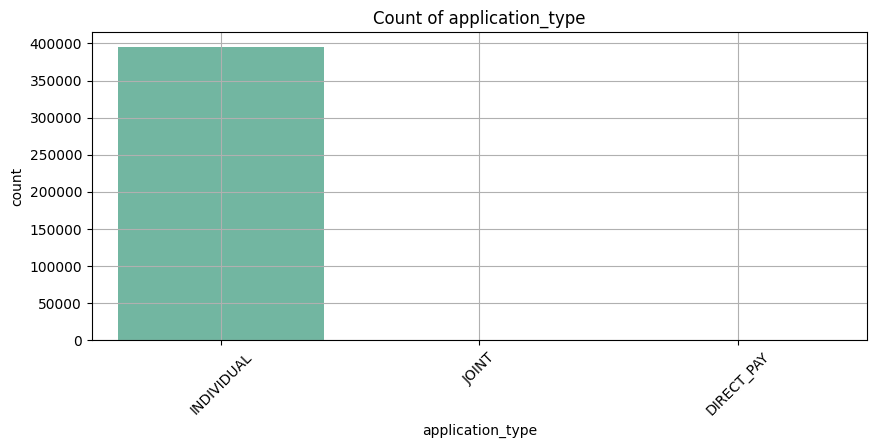

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].nunique() <= 15:  # Avoid overly large plots
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()


##  Bivariate Analysis

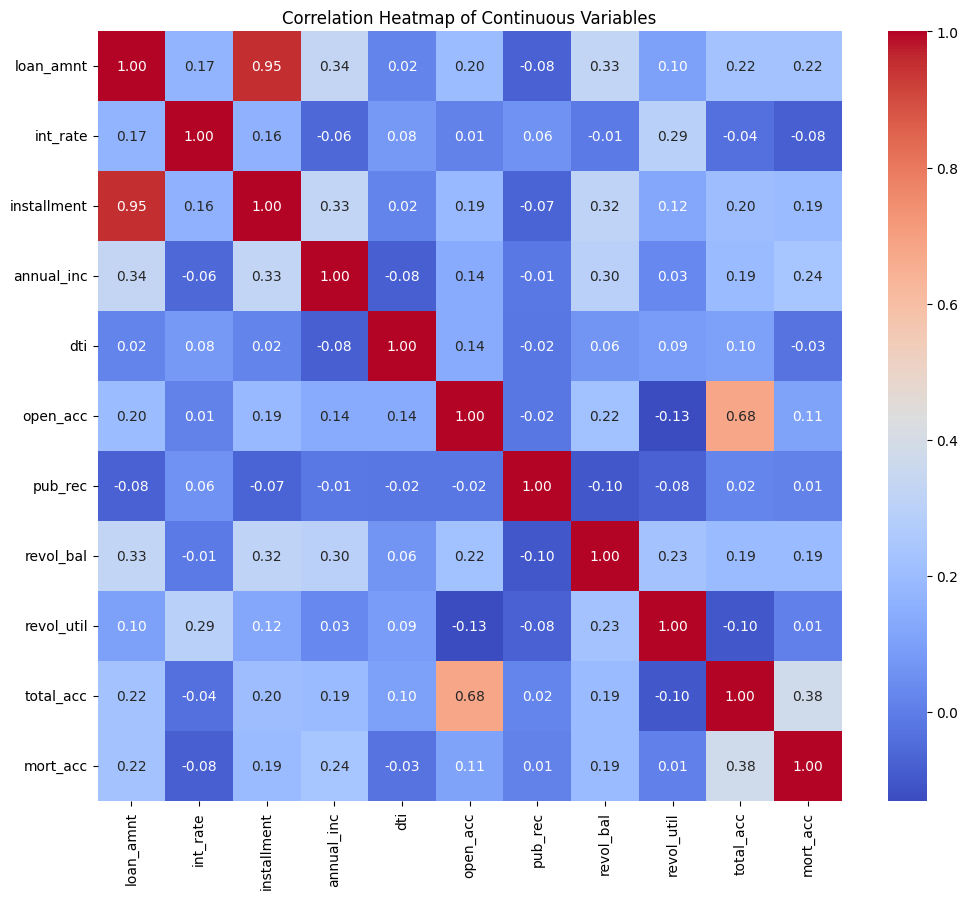

In [ ]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

* Continuous vs Target (loan_status)

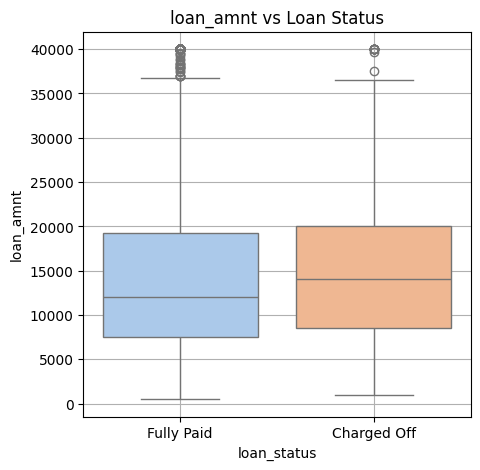

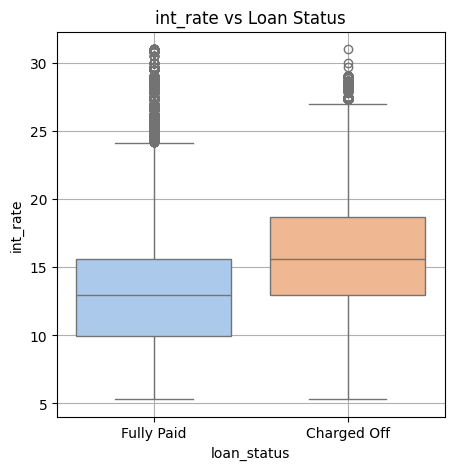

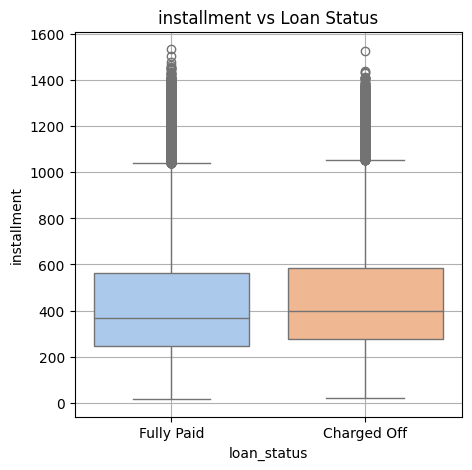

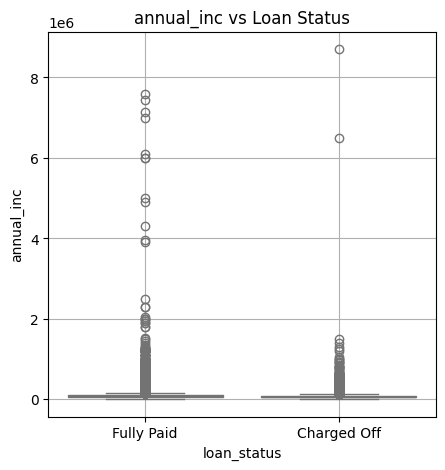

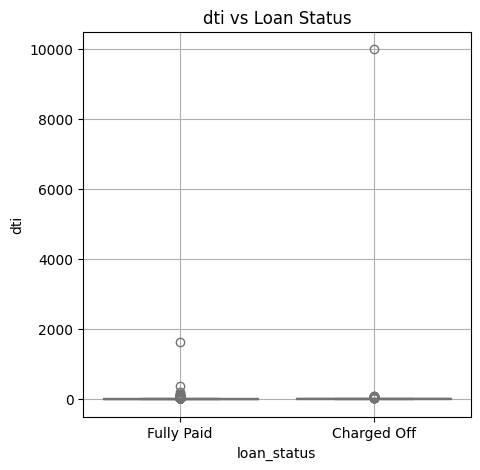

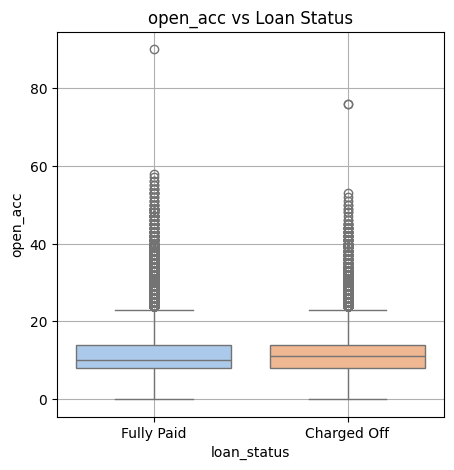

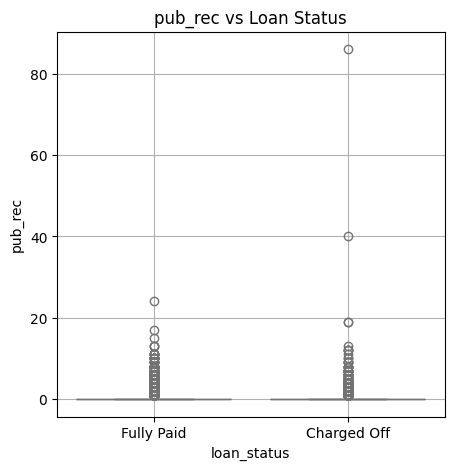

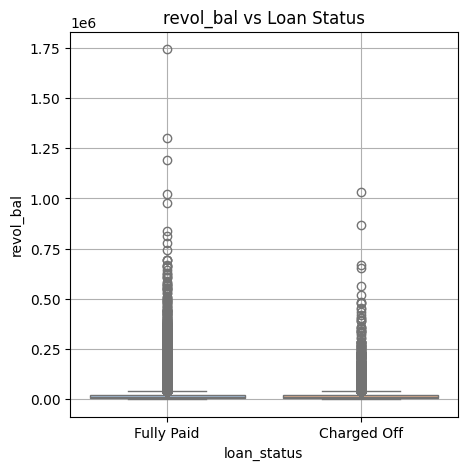

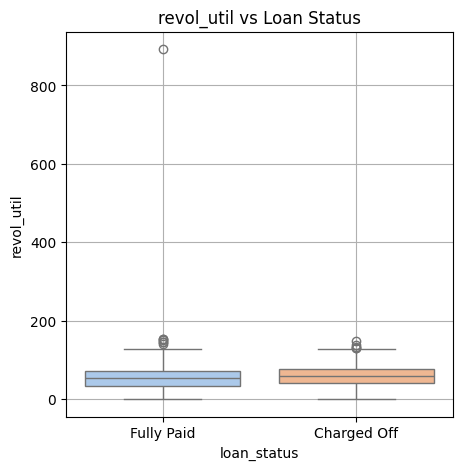

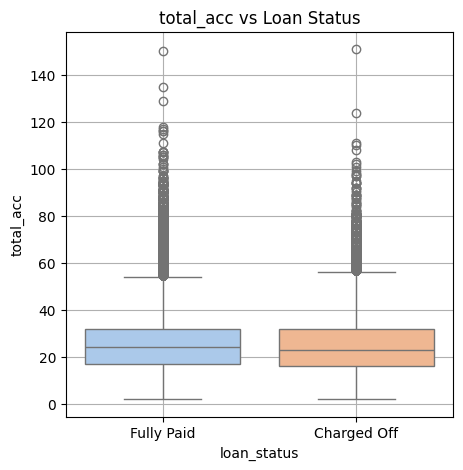

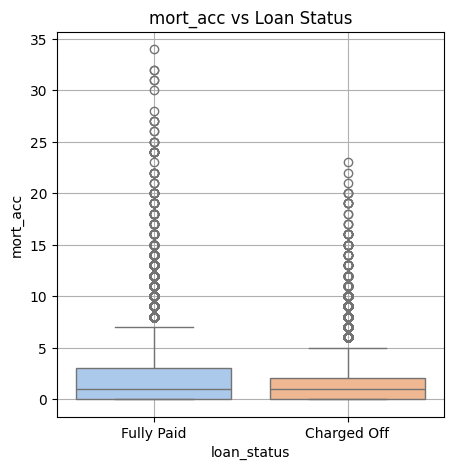

In [ ]:
# Convert target to numeric
df['loan_status_binary'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

for col in continuous_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df, x='loan_status', y=col, palette='pastel')
    plt.title(f'{col} vs Loan Status')
    plt.grid(True)
    plt.show()


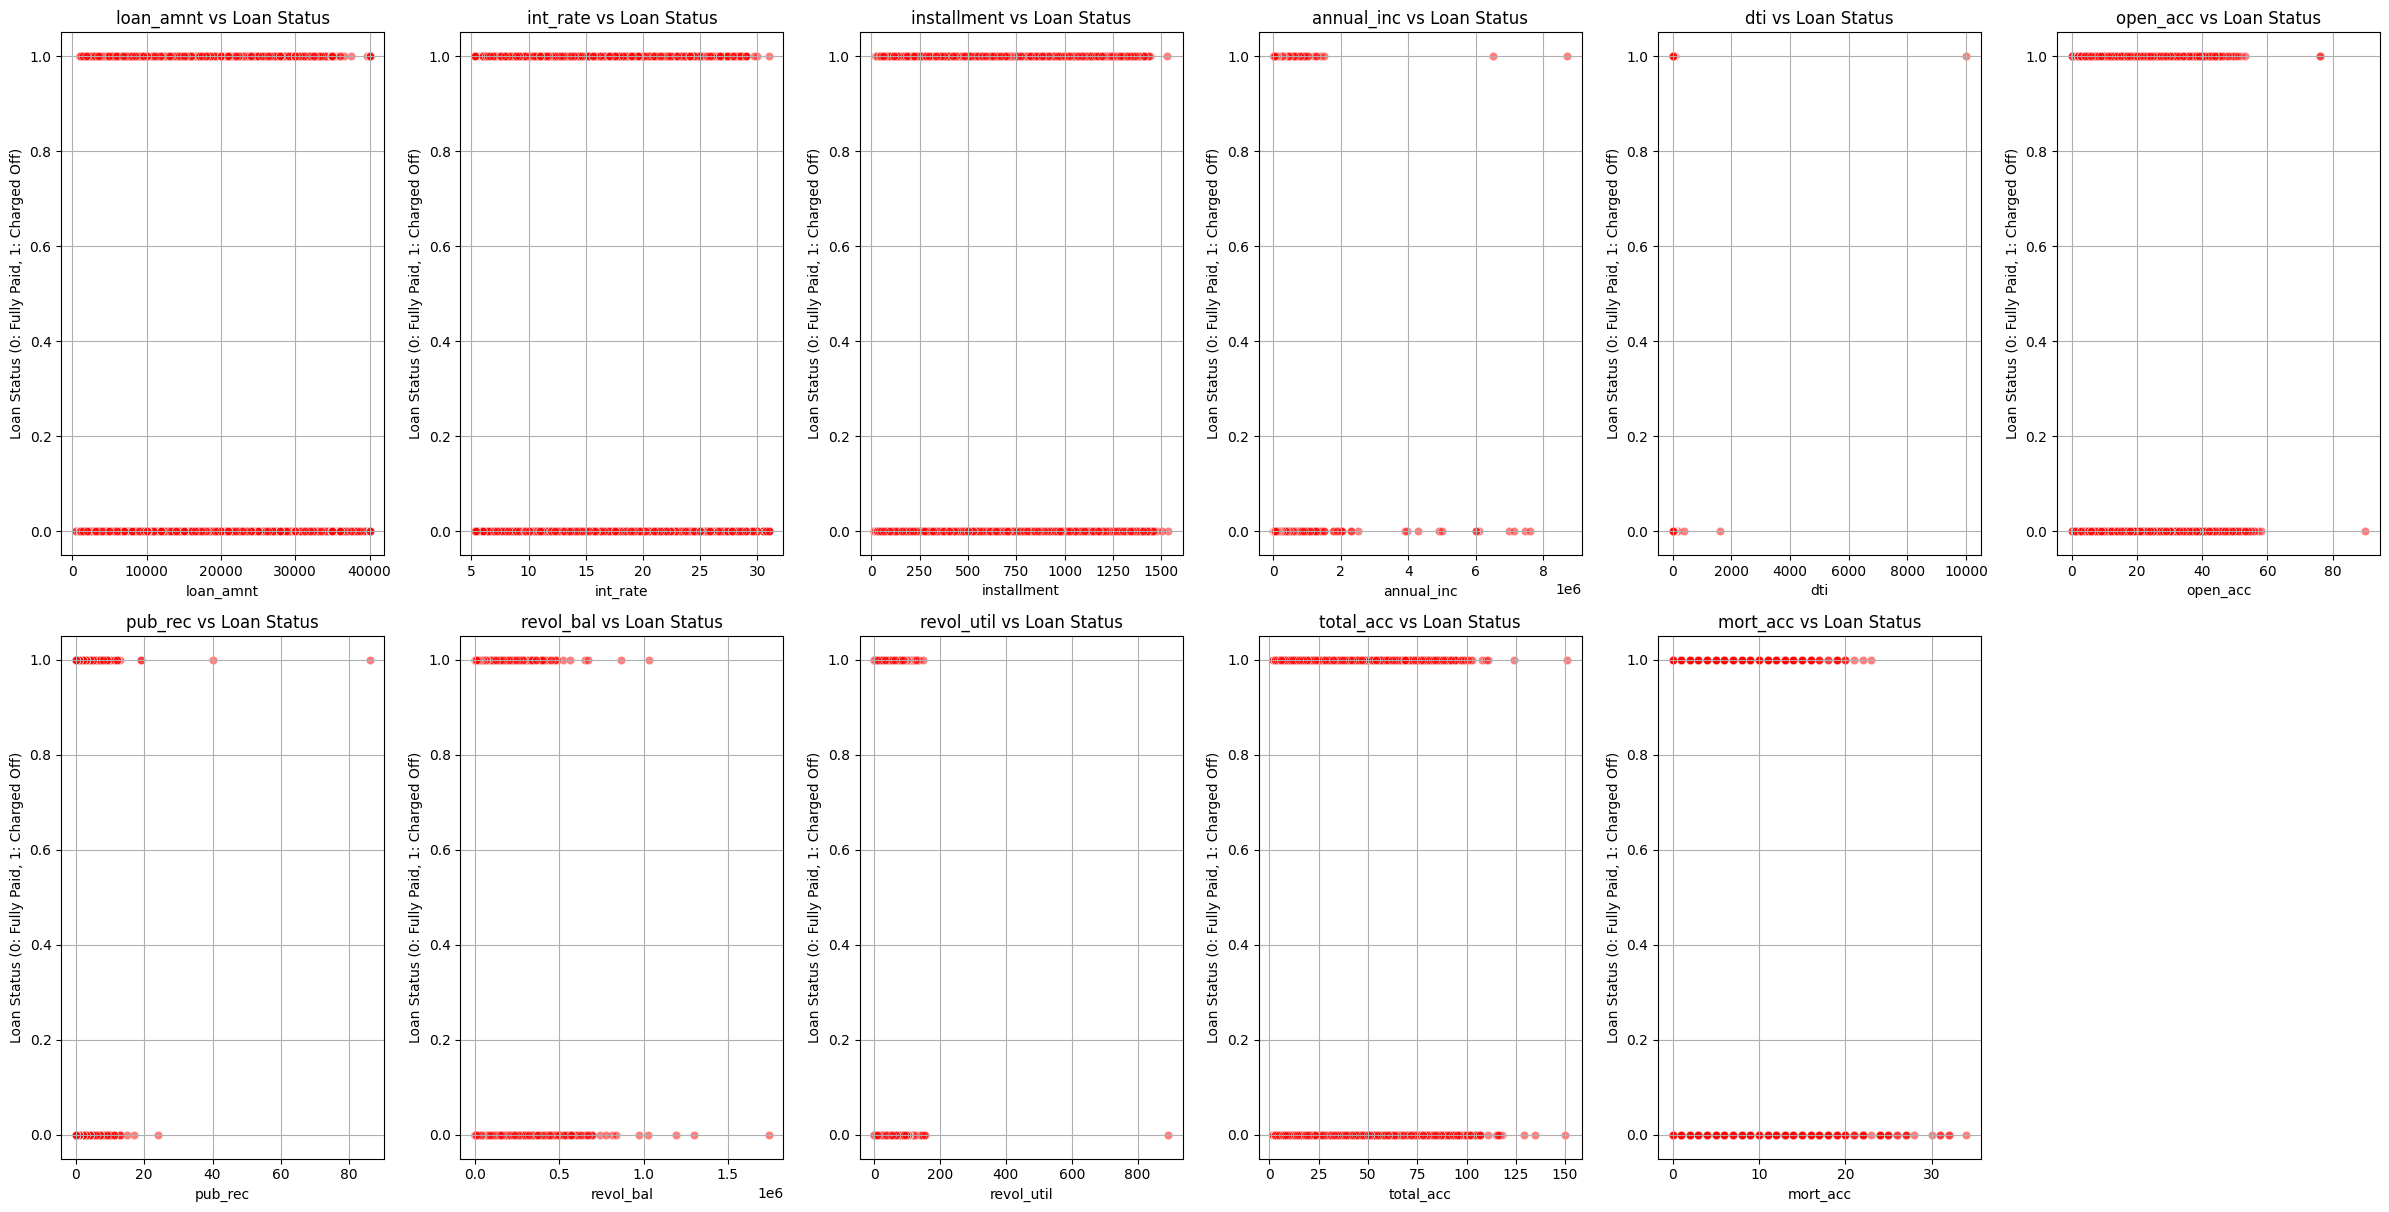

In [ ]:
# Convert target to numeric
df['loan_status_binary'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

fig, axes = plt.subplots(8, 6, figsize=(24, 48))  # 8x8 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easy iteration
for i,col in enumerate(continuous_cols):
    sns.scatterplot(data=df, x=col, y='loan_status_binary', color='red', alpha=0.5,ax=axes[i])
    axes[i].set_title(f'{col} vs Loan Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Loan Status (0: Fully Paid, 1: Charged Off)')
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



* Categorical vs Target

In [ ]:
# Scatter Plots



In [ ]:
# Heatmap



In [ ]:
# Summary statistics
summary = df[continuous_cols].describe().T
summary['range'] = summary['max'] - summary['min']
summary['skew'] = df[continuous_cols].skew()

print(summary[['min', '25%', '50%', '75%', 'max', 'range', 'skew']])


                min       25%       50%       75%         max       range  \
loan_amnt    500.00   8000.00  12000.00  20000.00    40000.00    39500.00   
int_rate       5.32     10.49     13.33     16.49       30.99       25.67   
installment   16.08    250.33    375.43    567.30     1533.81     1517.73   
annual_inc     0.00  45000.00  64000.00  90000.00  8706582.00  8706582.00   
dti            0.00     11.28     16.91     22.98     9999.00     9999.00   
open_acc       0.00      8.00     10.00     14.00       90.00       90.00   
pub_rec        0.00      0.00      0.00      0.00       86.00       86.00   
revol_bal      0.00   6025.00  11181.00  19620.00  1743266.00  1743266.00   
revol_util     0.00     35.80     54.80     72.90      892.30      892.30   
total_acc      2.00     17.00     24.00     32.00      151.00      149.00   
mort_acc       0.00      0.00      1.00      3.00       34.00       34.00   

                   skew  
loan_amnt      0.777285  
int_rate       0.420669

In [ ]:
# Correlation with target
correlations = df[continuous_cols + ['loan_status_binary']].corr()['loan_status_binary'].sort_values(ascending=False)
print(correlations)


loan_status_binary    1.000000
int_rate              0.247758
revol_util            0.082373
dti                   0.062413
loan_amnt             0.059836
installment           0.041082
open_acc              0.028012
pub_rec               0.019933
revol_bal            -0.010892
total_acc            -0.017893
annual_inc           -0.053432
mort_acc             -0.073111
Name: loan_status_binary, dtype: float64


# Data Preprocessing

* Dropping irrelevant columns

In [ ]:
cols_to_drop

{'address', 'earliest_cr_line', 'emp_title', 'issue_d', 'title'}

In [ ]:

df.drop(columns=cols_to_drop, inplace=True)


In [ ]:
df.application_type.value_counts()

,count
application_type,
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


* Duplicate value check

In [ ]:
#Drop duplicates

df.drop_duplicates(inplace=True)

In [ ]:
# 3. Separate features and target

X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [ ]:
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status_binary
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,0
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,0
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,0
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,0


In [ ]:
y

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Charged Off
...,...
396025,Fully Paid
396026,Fully Paid
396027,Fully Paid
396028,Fully Paid


In [ ]:
# 4. Identify column types

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

* Outlier treatment

In [ ]:
# 5. Handle outliers in continuous features using IQR

def clip_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower, upper)
    return df

X = clip_outliers(X, continuous_cols)


* Data preparation for modeling

In [ ]:
# 6. Build preprocessing pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, continuous_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [ ]:
categorical_cols

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [ ]:
continuous_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'loan_status_binary']

# Feature Engineering

# Model Building - Logistic Regression

In [ ]:
# 7. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
X_train

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status_binary
379004,18500.0,60 months,10.65,340.240,B,B2,10+ years,OWN,40000.0,Verified,...,8.0,0.0,8.0,0.1,27.0,f,INDIVIDUAL,NaN,0.0,0
24732,13175.0,36 months,16.55,466.780,D,D2,4 years,RENT,30000.0,Verified,...,6.0,0.0,1046.0,15.8,8.0,f,INDIVIDUAL,0.0,0.0,0
388453,35000.0,60 months,17.86,886.110,D,D5,10+ years,MORTGAGE,80000.0,Verified,...,12.0,0.0,20239.0,57.5,36.0,w,INDIVIDUAL,2.0,0.0,0
178101,20400.0,36 months,12.12,678.750,B,B3,10+ years,RENT,65000.0,Verified,...,18.0,0.0,12717.0,49.4,31.0,f,INDIVIDUAL,0.0,0.0,0
51902,35000.0,60 months,17.57,880.610,D,D4,10+ years,RENT,157500.0,Verified,...,5.0,0.0,14572.0,63.1,8.0,w,INDIVIDUAL,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69670,6450.0,36 months,13.33,218.360,C,C3,8 years,MORTGAGE,108000.0,Verified,...,16.0,0.0,26914.0,78.7,42.0,w,INDIVIDUAL,7.5,0.0,0
253336,35000.0,36 months,8.67,1042.755,B,B1,2 years,MORTGAGE,153000.0,Verified,...,14.0,0.0,27229.0,42.7,50.0,f,INDIVIDUAL,5.0,0.0,0
49152,8000.0,36 months,10.99,261.880,B,B3,4 years,RENT,52000.0,Source Verified,...,9.0,0.0,3601.0,39.6,32.0,f,INDIVIDUAL,2.0,0.0,0
346367,14000.0,36 months,12.49,468.290,B,B5,5 years,RENT,80000.0,Verified,...,11.0,0.0,13187.0,42.5,15.0,f,INDIVIDUAL,0.0,0.0,0


In [ ]:

# 8. Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# 9. Address class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)


In [ ]:
X_train_processed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5403714 stored elements and shape (316824, 87)>

In [ ]:
# 10. Logistic Regression model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_balanced, y_train_balanced)



LogisticRegression(max_iter=1000)

In [ ]:
type(X_train_balanced)

# Model Evaluation

* ROC AUC Curve & comments

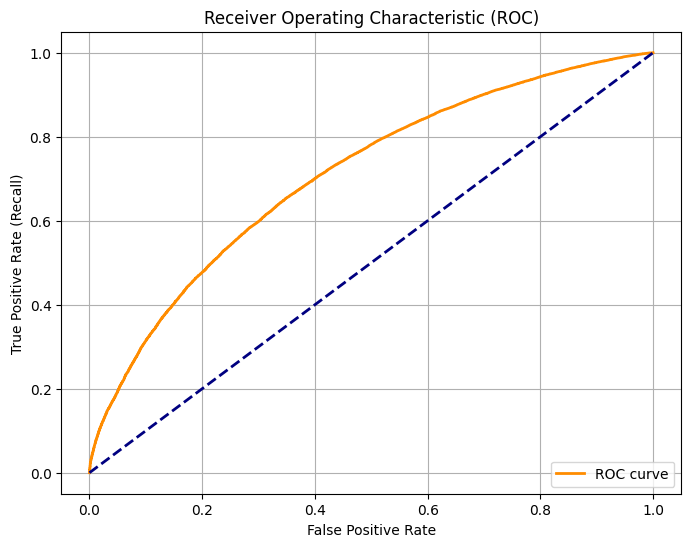

AUC Score: 0.71


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_proba = model.predict_proba(X_test_processed)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='Fully Paid')  # Or 1, depending on how your target is encoded

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.2f}")


* Precision Recall Curve & comments

In [ ]:
# 11. Evaluate model
y_pred = model.predict(X_test_processed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.31      0.66      0.42     15535
  Fully Paid       0.89      0.65      0.75     63671

    accuracy                           0.65     79206
   macro avg       0.60      0.65      0.59     79206
weighted avg       0.77      0.65      0.68     79206



* Classification Report (Confusion Matrix etc)

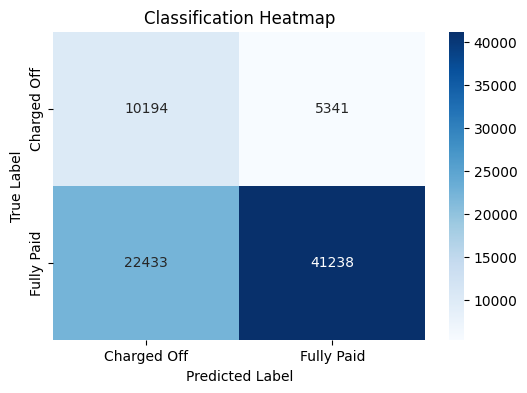

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on processed test data
y_pred = model.predict(X_test_processed)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Classification Heatmap')
plt.show()


# Model Improvement (V2)



In [ ]:
coeffs=model.coef_[0]
features=X.columns
coef_df=pd.DataFrame({'Features':features,'Coefficients':coeffs})
coef_df=pd.DataFrame({'Features':features,'Coefficients':coeffs})
coef_df=coef_df.sort_values(by='Coefficients',key=abs,ascending=False)
coef_df

ValueError: All arrays must be of the same length

* Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1', cv=5)
grid.fit(X_train_balanced, y_train_balanced)

best_model = grid.best_estimator_


* New Model Evaluation

In [ ]:
y_pred_v2 = best_model.predict(X_test_processed)
print(classification_report(y_test, y_pred_v2))

# Optional: Confusion matrix or ROC


# Actionable Insights & Recommendations